# Initial Atlas Application

## Purpose:

This file was created to understand how to apply an atlas to a fMRI file and store data into a `pandas` dataframe.

The content of this notebook is experimental in nature and shows multiple dataframes that could work for the project

## Results:

Eight potential dataframes using the region and time values:

1. Voxel vs. time (excluding mean time for voxel)

2. Voxel vs. time (including mean time for voxel)

3. Voxel vs. atlas region and time (including mean time for voxel)

4. Voxel vs. atlas region and time (excluding mean time for voxel)

5. Voxel vs. atlas region and mean time for voxel

6. Atlas region vs. mean time for region

7. Atlas region vs. time for region

8. Time for region vs. atlas region

## Contents

1. Load Data: Loading the fMRI file and atlas

2. Generate Dataframe: Creating the desired dataframe

    a. Time data: Adding the raw data based on the time parameter of the fRMI file
    
    b. Atlas data: Adding the atlas data to the respective voxels

**----------------------------------------------------------------------------------------------------------------------------**

## Imports

All necessary imports are located in this code cell. 

This includes:

- `os` to access the filepath

- `nibabel` to load the NIfTI file types

- `matplotlib.pyplot` to generate plots and view images

- `scipy.ndimage` to rotate images

- `pandas` for dataframe creation and manipulation

- `numpy` for linear algebra

In [1]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
import pandas as pd
import numpy as np

## File Paths

In this section is the filepaths to the main files used in this notebook.

Since the files are located in a folder outside the current working directory, accessing the files takes more effort than loading only the file name.

### Base filepath

This code get the filepath to the base folder for the project. From here, any file within the program can be accessed without needing to ascend another directory level

In [2]:
# Get current directory
os.path.abspath(os.curdir)

# Go up a directory level
os.chdir('..')

# Set baseline filepath to the project folder directory
base_folder_filepath = os.path.abspath(os.curdir)

### Image filepath

This code is the filepaths to both of the NIfTI files used in this notebok. This includes the fMRI and atlas files.

In [3]:
img_filepath = base_folder_filepath + '\\Data\\Preprocessed_data\\Brown\\0026001\\sfnwmrda0026001_session_1_rest_1.nii.gz'
atlas_filepath = base_folder_filepath + '\\Data\\Atlases\\aal_mask_pad.nii.gz'

**----------------------------------------------------------------------------------------------------------------------------**

## Load Data

This is where the data will be loaded. For simplicity, only one fMRI file will be loaded and have the atlas applied

### fMRI File

This is a sample of an image that will have the atlas applied to it.

This particular image is from patient 0026001 who was screened at the Brown University site

In [4]:
img = nib.load(img_filepath)
img_data = img.get_fdata()

img_data.shape

(49, 58, 47, 247)

This image is a four-dimensional dataset. 
The first three dimensions are spatial features corresponding to x, y, and z. The fourth dimension is time.

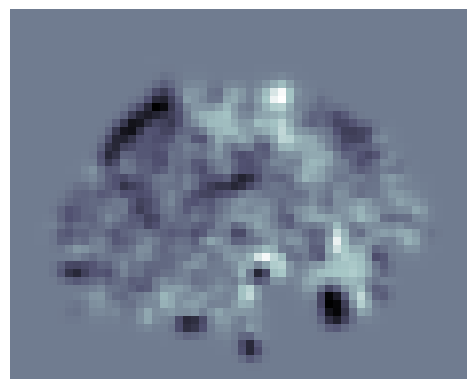

In [5]:
plt.imshow(ndi.rotate(img_data[25, :, :, 0], 90), cmap='bone')
plt.axis('off')
plt.show()

This is a sample image of the fMRI taken at time = 0 and x = 25. 
The pixel intensity represents areas of electrical activity in the brain during the scan.

### Atlas

This is the atlas template that will be applied to the images. 

The image shows one slice of the file with different colors signifying different regions

In [6]:
atlas = nib.load(atlas_filepath)
atlas_data = atlas.get_fdata()

atlas_data.shape

(49, 58, 47)

This atlas has the same spatial dimensions as the fMRI. It is missing the time dimension because this atlas is constant over time.

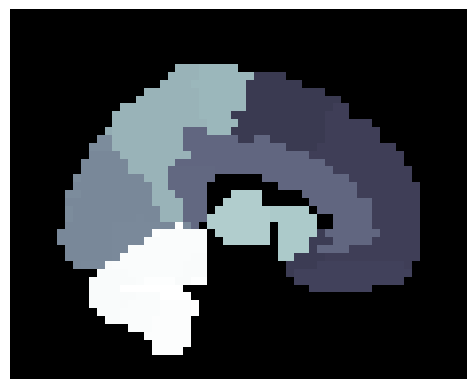

In [7]:
plt.imshow(ndi.rotate(atlas_data[25, :, :], 90), cmap='bone')
plt.axis('off')
plt.show()

This is a slice of the atlas taken at the same location as the fMRI image above. Distinct regions are visible.

**----------------------------------------------------------------------------------------------------------------------------**

## Generate DataFrames

Create dataframes containing information about points and regions.

### DataFrame Structure

The dataframes will provide insight to brain behavior at points and regions of the brain using various time metrics.

**Contents:**

- Rows will represent each individual point in the file

- Columns will represent features

    - First column will indicate which region the atlas assigned to point to
    
    - All columns following will be the raw data for each moment in time

### Time data

The first information in the dataframe will be the raw data.

The fMRI file contains data for 247 time values, each having unique values for the points in the file. It is important to capture all of this data in the dataframe.

The columns in this dataframe have added `'time_'` before the time value for clarity

In [8]:
column_names = ['time_' + str(i) for i in range(247)]

df_times = pd.DataFrame(img_data.reshape(-1, 247), columns = column_names)
df_times.head()

time_0  time_1  time_2  time_3  time_4  time_5  time_6  time_7  time_8   
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  \
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   time_9  ...  time_237  time_238  time_239  time_240  time_241  time_242   
0     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0  \
1     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   time_243  time_244  time_245  time_246  
0       0.0       0.0       0.0       0.0  
1       0.0       0.0       0.0       0.0  
2       0.0       0.0       0.0       0.0  
3       0.0       0.0       0.0       0.0  
4       0.0       0.0       0.0       0.0  

[5 rows x 247 columns]

#### Mean Time

This adds a column for the mean value of each of the time points. This could be useful to see a general view of how each region corresponds to the voxel

In [9]:
means = df_times.mean(axis=1)
df_times_w_mean = df_times.copy()
df_times_w_mean.insert(0, 'time_mean', means)
df_times_w_mean.head()

time_mean  time_0  time_1  time_2  time_3  time_4  time_5  time_6  time_7   
0        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  \
1        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   time_8  ...  time_237  time_238  time_239  time_240  time_241  time_242   
0     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0  \
1     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   time_243  time_244  time_245  time_246  
0       0.0       0.0       0.0       0.0  
1       0.0       0.0       0.0       0.0  
2       0.0       0.0       0.0       0.0  
3       0.0       0.0       0.0       0.0  
4       0.0       0.0       0.0       0.0  

[5 rows x 248 columns]

### Atlas data

The data from the atlas is then added to the dataframe. 

The atlas file contains a value for each voxel in the file that assigns it to a region of the brain determiend by neuroscientists.

This column was added as the first column in the dataframe to elimintate the need to scroll to see the feature. The name of the column was changed to better represent the data it contains.

In [10]:
df_full = pd.concat([pd.Series(atlas_data.reshape(-1)), df_times_w_mean], axis=1)
df_full = df_full.rename(columns={0:'atlas_region'})
df_full.head()

atlas_region  time_mean  time_0  time_1  time_2  time_3  time_4  time_5   
0           0.0        0.0     0.0     0.0     0.0     0.0     0.0     0.0  \
1           0.0        0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2           0.0        0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3           0.0        0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0        0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   time_6  time_7  ...  time_237  time_238  time_239  time_240  time_241   
0     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0  \
1     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0   
2     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0   
3     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0   
4     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0   

   time_242  time_243  time_244  time_245  time_246  
0       0.0       0.0       0.0       0.0       0.0  
1       0.0       0.0       0.0       0.0       0.0  
2       0.0       0.0       0.0       0.0       0.0  
3       0.0       0.0       0.0       0.0       0.0  
4       0.0       0.0       0.0       0.0       0.0  

[5 rows x 249 columns]

The atlas has assigned the points to 117 unique regions.

In [11]:
df_full['atlas_region'].nunique()

117

In [12]:
df_atlas_times = df_full.drop('time_mean', axis=1)
df_atlas_times.head()

atlas_region  time_0  time_1  time_2  time_3  time_4  time_5  time_6   
0           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  \
1           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   time_7  time_8  ...  time_237  time_238  time_239  time_240  time_241   
0     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0  \
1     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0   
2     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0   
3     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0   
4     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0   

   time_242  time_243  time_244  time_245  time_246  
0       0.0       0.0       0.0       0.0       0.0  
1       0.0       0.0       0.0       0.0       0.0  
2       0.0       0.0       0.0       0.0       0.0  
3       0.0       0.0       0.0       0.0       0.0  
4       0.0       0.0       0.0       0.0       0.0  

[5 rows x 248 columns]

### Region x Mean Time DataFrame

This dataframe contains only the region assigned by the atlas and the mean of the raw_data for all time.

In [13]:
df_region_x_mean_time = df_full[['atlas_region','time_mean']]

df_region_x_mean_time.head()

atlas_region  time_mean
0           0.0        0.0
1           0.0        0.0
2           0.0        0.0
3           0.0        0.0
4           0.0        0.0

In [14]:
df_region_x_mean_time.shape

(133574, 2)

This shows the mean value for each region

In [15]:
regions = df_region_x_mean_time.groupby('atlas_region').mean()
regions

time_mean
atlas_region           
0.0            0.000295
2001.0        -0.005261
2002.0         0.001599
2101.0        -0.022958
2102.0         0.007711
...                 ...
9130.0        -0.005743
9140.0         0.004223
9150.0         0.019164
9160.0         0.030193
9170.0         0.023945

[117 rows x 1 columns]

The maximum and minimum regions

In [16]:
print('Maximum region mean:', regions.max())
print('Maximum region mean:', regions.min())

Maximum region mean: time_mean    0.040385
dtype: float64
Maximum region mean: time_mean   -0.078586
dtype: float64


In [17]:
regions_array = regions.to_numpy()
regions_array.shape

(117, 1)

### Region x Time Dataframe

This is the relationship of regions and 

**Structure:**

- Rows = Time values

- Columns = Atlas regions

In [18]:
regions_x_time = df_atlas_times.groupby('atlas_region').mean()
regions_x_time

time_0    time_1    time_2    time_3    time_4    time_5   
atlas_region                                                               
0.0          -0.010099  0.013498  0.035757  0.045200  0.039266  0.024453  \
2001.0        1.692365  1.563411  0.747202 -0.273904 -0.974473 -1.128608   
2002.0        0.659177  0.639452  0.420765  0.308812  0.456353  0.720466   
2101.0        0.151973  0.418374  1.303733  2.337760  2.914812  2.743485   
2102.0        0.143743  0.354073  0.600906  0.815291  0.900404  0.797972   
...                ...       ...       ...       ...       ...       ...   
9130.0       -0.700616 -0.339021 -0.125760 -0.339286 -0.914707 -1.473242   
9140.0       -1.747539 -2.183471 -2.241057 -1.994922 -1.578740 -1.108074   
9150.0        0.596513  1.062731  0.849358  0.058849 -0.819443 -1.276242   
9160.0        1.273485  2.104663  1.892425  0.707091 -0.756593 -1.671998   
9170.0        0.878533  3.351847  4.835869  4.253907  1.829739 -1.053348   

                time_6    time_7    time_8    time_9  ...  time_237  time_238   
atlas_region                                          ...                       
0.0           0.009799 -0.000222 -0.007501 -0.016107  ... -0.102615 -0.094255  \
2001.0       -0.871923 -0.498292 -0.211244 -0.035654  ...  3.543470  3.464397   
2002.0        0.817896  0.623798  0.325246  0.276293  ...  4.316790  4.555073   
2101.0        2.029023  1.249384  0.728115  0.375654  ... -1.850897 -2.117193   
2102.0        0.532047  0.195487 -0.106767 -0.310437  ... -0.734564 -0.697949   
...                ...       ...       ...       ...  ...       ...       ...   
9130.0       -1.593321 -1.114157 -0.241731  0.611092  ... -1.537637  0.826835   
9140.0       -0.638331 -0.163360  0.350997  0.911424  ... -0.838162  0.602401   
9150.0       -1.121300 -0.542370  0.117429  0.641655  ...  1.089664  1.169585   
9160.0       -1.637974 -0.880726  0.016241  0.593492  ...  1.163112  0.477590   
9170.0       -2.836791 -2.831620 -1.534796 -0.058628  ... -2.056498 -1.929668   

              time_239  time_240  time_241  time_242  time_243  time_244   
atlas_region                                                               
0.0          -0.057972 -0.009564  0.034287  0.063249  0.074109  0.067912  \
2001.0        1.997852  0.070382 -1.454879 -2.283037 -2.631729 -2.791547   
2002.0        2.906810  0.384342 -1.838814 -3.144503 -3.596402 -3.550900   
2101.0       -2.089320 -1.978564 -1.946051 -1.894787 -1.548241 -0.748108   
2102.0       -0.348394  0.165908  0.609005  0.812228  0.764356  0.582065   
...                ...       ...       ...       ...       ...       ...   
9130.0        2.623091  3.085606  2.213506  0.661584 -0.741414 -1.476072   
9140.0        1.302015  1.173707  0.648749  0.288869  0.362609  0.699112   
9150.0        0.580643 -0.224274 -0.640980 -0.431741  0.087269  0.340139   
9160.0       -0.479400 -1.290556 -1.518138 -1.075415 -0.349842  0.064650   
9170.0       -1.642300 -1.753779 -2.092145 -2.020808 -1.160273  0.138030   

              time_245  time_246  
atlas_region                      
0.0           0.048045  0.020730  
2001.0       -2.768334 -2.328003  
2002.0       -3.215132 -2.548798  
2101.0        0.310491  1.147373  
2102.0        0.399574  0.271834  
...                ...       ...  
9130.0       -1.505898 -1.105750  
9140.0        0.894703  0.675121  
9150.0        0.001221 -0.722981  
9160.0       -0.170726 -0.867385  
9170.0        1.024011  0.885410  

[117 rows x 247 columns]

In [19]:
mean_times_columns = ['time_' + str(i) for i in range(247)]
region_names = ['region_' + str(region) for region in regions_x_time.index]

regions_x_time.index = region_names
regions_x_time.columns = mean_times_columns
regions_x_time.head()

time_0    time_1    time_2    time_3    time_4    time_5   
region_0.0    -0.010099  0.013498  0.035757  0.045200  0.039266  0.024453  \
region_2001.0  1.692365  1.563411  0.747202 -0.273904 -0.974473 -1.128608   
region_2002.0  0.659177  0.639452  0.420765  0.308812  0.456353  0.720466   
region_2101.0  0.151973  0.418374  1.303733  2.337760  2.914812  2.743485   
region_2102.0  0.143743  0.354073  0.600906  0.815291  0.900404  0.797972   

                 time_6    time_7    time_8    time_9  ...  time_237   
region_0.0     0.009799 -0.000222 -0.007501 -0.016107  ... -0.102615  \
region_2001.0 -0.871923 -0.498292 -0.211244 -0.035654  ...  3.543470   
region_2002.0  0.817896  0.623798  0.325246  0.276293  ...  4.316790   
region_2101.0  2.029023  1.249384  0.728115  0.375654  ... -1.850897   
region_2102.0  0.532047  0.195487 -0.106767 -0.310437  ... -0.734564   

               time_238  time_239  time_240  time_241  time_242  time_243   
region_0.0    -0.094255 -0.057972 -0.009564  0.034287  0.063249  0.074109  \
region_2001.0  3.464397  1.997852  0.070382 -1.454879 -2.283037 -2.631729   
region_2002.0  4.555073  2.906810  0.384342 -1.838814 -3.144503 -3.596402   
region_2101.0 -2.117193 -2.089320 -1.978564 -1.946051 -1.894787 -1.548241   
region_2102.0 -0.697949 -0.348394  0.165908  0.609005  0.812228  0.764356   

               time_244  time_245  time_246  
region_0.0     0.067912  0.048045  0.020730  
region_2001.0 -2.791547 -2.768334 -2.328003  
region_2002.0 -3.550900 -3.215132 -2.548798  
region_2101.0 -0.748108  0.310491  1.147373  
region_2102.0  0.582065  0.399574  0.271834  

[5 rows x 247 columns]

In [20]:
regions_x_time_array = regions_x_time.to_numpy()
regions_x_time_array.shape

(117, 247)

### Time x Region Dataframe

This dataframe shows the previous dataframe with the columns and rows switched. This is another way to understand how regions are acted at different times

**Structure:**

- Rows = Time values

- Columns = Atlas regions

In [21]:
time_x_regions = regions_x_time.transpose()
time_x_regions.head()

region_0.0  region_2001.0  region_2002.0  region_2101.0   
time_0   -0.010099       1.692365       0.659177       0.151973  \
time_1    0.013498       1.563411       0.639452       0.418374   
time_2    0.035757       0.747202       0.420765       1.303733   
time_3    0.045200      -0.273904       0.308812       2.337760   
time_4    0.039266      -0.974473       0.456353       2.914812   

        region_2102.0  region_2111.0  region_2112.0  region_2201.0   
time_0       0.143743      -0.226049      -0.528123       0.055136  \
time_1       0.354073      -0.470606      -1.516448       0.190007   
time_2       0.600906      -0.357975      -2.591700       0.639195   
time_3       0.815291       0.029349      -3.399262       1.159353   
time_4       0.900404       0.441910      -3.633299       1.371073   

        region_2202.0  region_2211.0  ...  region_9081.0  region_9082.0   
time_0      -0.245243       0.126527  ...       0.208502       0.411973  \
time_1      -0.095830      -0.354106  ...       1.182511       0.974729   
time_2      -0.145639      -0.774796  ...       1.385276       1.211552   
time_3      -0.350754      -0.777107  ...       0.708627       1.012142   
time_4      -0.609605      -0.254265  ...      -0.331555       0.527244   

        region_9100.0  region_9110.0  region_9120.0  region_9130.0   
time_0       0.285178      -0.067810      -0.419342      -0.700616  \
time_1       0.694752      -0.185746      -0.916164      -0.339021   
time_2       1.122798      -0.688321      -1.372809      -0.125760   
time_3       1.752443      -1.031409      -1.331097      -0.339286   
time_4       2.556496      -0.753411      -0.667300      -0.914707   

        region_9140.0  region_9150.0  region_9160.0  region_9170.0  
time_0      -1.747539       0.596513       1.273485       0.878533  
time_1      -2.183471       1.062731       2.104663       3.351847  
time_2      -2.241057       0.849358       1.892425       4.835869  
time_3      -1.994922       0.058849       0.707091       4.253907  
time_4      -1.578740      -0.819443      -0.756593       1.829739  

[5 rows x 117 columns]

In [22]:
time_x_regions_array = time_x_regions.to_numpy()
time_x_regions_array.shape

(247, 117)

## Create Vector

Condense the dataframe for region by time to a 1D vector

Reshape the array for the region by time dataframe to be one-dimensional

In [23]:
regions_x_time_vector = regions_x_time_array.reshape(-1)
regions_x_time_vector.shape

(28899,)

The values from the array correspond to points in the dataframe

In [24]:
print('Vector index 3 (time 3, region 0):', regions_x_time_vector[3])
print('Vector index 247 (time 0, region 2001):', regions_x_time_vector[247])

Vector index 3 (time 3, region 0): 0.04519964062404537
Vector index 247 (time 0, region 2001): 1.6923650780764337


Using this method, the vector is formed by combining rows. 

The first items in the dataset are the points in the first row, then the second, then the third, and so on.

## Turn vector into Dataframe

Return the vector to its array form so that it fits in a dataframe again

Use the shape of the original dataframe to turn the vector into an array again

In [25]:
regions_x_time_array2 = regions_x_time_vector.reshape(117,247)

Turn the arary into a dataframe for easier readability.

In [26]:
regions_x_time_df_fromVector = pd.DataFrame(data=regions_x_time_array2)
regions_x_time_df_fromVector.head()

0         1         2         3         4         5         6     
0 -0.010099  0.013498  0.035757  0.045200  0.039266  0.024453  0.009799  \
1  1.692365  1.563411  0.747202 -0.273904 -0.974473 -1.128608 -0.871923   
2  0.659177  0.639452  0.420765  0.308812  0.456353  0.720466  0.817896   
3  0.151973  0.418374  1.303733  2.337760  2.914812  2.743485  2.029023   
4  0.143743  0.354073  0.600906  0.815291  0.900404  0.797972  0.532047   

        7         8         9    ...       237       238       239       240   
0 -0.000222 -0.007501 -0.016107  ... -0.102615 -0.094255 -0.057972 -0.009564  \
1 -0.498292 -0.211244 -0.035654  ...  3.543470  3.464397  1.997852  0.070382   
2  0.623798  0.325246  0.276293  ...  4.316790  4.555073  2.906810  0.384342   
3  1.249384  0.728115  0.375654  ... -1.850897 -2.117193 -2.089320 -1.978564   
4  0.195487 -0.106767 -0.310437  ... -0.734564 -0.697949 -0.348394  0.165908   

        241       242       243       244       245       246  
0  0.034287  0.063249  0.074109  0.067912  0.048045  0.020730  
1 -1.454879 -2.283037 -2.631729 -2.791547 -2.768334 -2.328003  
2 -1.838814 -3.144503 -3.596402 -3.550900 -3.215132 -2.548798  
3 -1.946051 -1.894787 -1.548241 -0.748108  0.310491  1.147373  
4  0.609005  0.812228  0.764356  0.582065  0.399574  0.271834  

[5 rows x 247 columns]

Fix the columns and indices of the dataframe to better represent what the rows and columns contain.

This will make the dataframe more readable and easier for all viewers to understand.

In [27]:
column_names = ['time_' + str(i) for i in range(247)]
region_names = ['region_' + str(region) for region in np.unique(atlas_data.reshape(-1))]

regions_x_time_df_fromVector.columns = column_names
regions_x_time_df_fromVector.index = region_names

regions_x_time_df_fromVector.head()

time_0    time_1    time_2    time_3    time_4    time_5   
region_0.0    -0.010099  0.013498  0.035757  0.045200  0.039266  0.024453  \
region_2001.0  1.692365  1.563411  0.747202 -0.273904 -0.974473 -1.128608   
region_2002.0  0.659177  0.639452  0.420765  0.308812  0.456353  0.720466   
region_2101.0  0.151973  0.418374  1.303733  2.337760  2.914812  2.743485   
region_2102.0  0.143743  0.354073  0.600906  0.815291  0.900404  0.797972   

                 time_6    time_7    time_8    time_9  ...  time_237   
region_0.0     0.009799 -0.000222 -0.007501 -0.016107  ... -0.102615  \
region_2001.0 -0.871923 -0.498292 -0.211244 -0.035654  ...  3.543470   
region_2002.0  0.817896  0.623798  0.325246  0.276293  ...  4.316790   
region_2101.0  2.029023  1.249384  0.728115  0.375654  ... -1.850897   
region_2102.0  0.532047  0.195487 -0.106767 -0.310437  ... -0.734564   

               time_238  time_239  time_240  time_241  time_242  time_243   
region_0.0    -0.094255 -0.057972 -0.009564  0.034287  0.063249  0.074109  \
region_2001.0  3.464397  1.997852  0.070382 -1.454879 -2.283037 -2.631729   
region_2002.0  4.555073  2.906810  0.384342 -1.838814 -3.144503 -3.596402   
region_2101.0 -2.117193 -2.089320 -1.978564 -1.946051 -1.894787 -1.548241   
region_2102.0 -0.697949 -0.348394  0.165908  0.609005  0.812228  0.764356   

               time_244  time_245  time_246  
region_0.0     0.067912  0.048045  0.020730  
region_2001.0 -2.791547 -2.768334 -2.328003  
region_2002.0 -3.550900 -3.215132 -2.548798  
region_2101.0 -0.748108  0.310491  1.147373  
region_2102.0  0.582065  0.399574  0.271834  

[5 rows x 247 columns]

**Success!** This dataframe matches the one that the vector originated from.